5.순환신경망

Contents
<div id="toc"></div>

# 1. 순환 신경망 (RNN; Recurrent Neural Network)

- 시퀀스(sequence) 및 시계열(time series) 데이터에 대한 학습을 통해 예측을 수행하기 위한 인공 신경망 구조
    - 자동 번역과 같은 자연어 인식 및 처리, 주식 거래, 문장 및 문서 인식 등과 같이 연속적이고 순서에 의미가 있는 데이터들의 처리에 뛰어난 성능을 보인다.

- 신호가 입력층 쪽에서 출력층을 향해서 한 방향으로만 흐르는 신경망을 피드포워드(feed-forward) 신경망이라고 한다.
- 순환 신경망은 은닉층의 결과를 다음 상위층으로도 보내면서 다시 현재 은닉층에서의 다음 계산 입력으로 보낼 수 있도록 **순환적 구조**를 가지고 있는 신경망이다.
- 즉, 각각의 노드들은 외부의 입력과 함께 자신의 이전 상태를 받아서 자신의 현재 상태를 갱신한다.

## 1.1. 순환 뉴런 (Recurrent Neuron)

- 각 타임 스텝(time step)마다 직전 타임 스텝의 출력을 입력받은 뒤 계산 결과인 출력을 상위층으로 내보내고, 이와 함께 자기 자신에게도 그 출력을 보낸다.
<img src="img/ch5_1.png" width="70%"> 

## 1.2. 순환 뉴런의 층

- 순환 뉴런으로 구성된 층 역시 마찬가지로, 각 타임 스텝마다 해당 층의 모든 뉴런들은 하위층의 입력과 직전 타임 스텝의 출력을 입력 받는다.
<img src="img/ch5_2.png" width="70%"> 

## 1.3. 메모리 셀  (Memory Cell)

- 순환 뉴런은 이전의 타임 스텝에서 발생한 결과를 입력으로 받아서 이를 기반으로 출력이 결정되며, 타임 스텝(과거)의 상태를 기억하고 있기 때문에 순환 뉴런 또는 그 순환 뉴런들의 층을 **메모리 셀(memory cell)** 또는 간단히 셀이라고 한다.
- 순환 뉴런은 출력 $y_{(t)}$와 이전 상태 $h_{(t-1)}$가 구분될 수 있으며, 입력 $x_{(t)}$와 이전 상태 $h_{(t-1)}$가 들어가서 현재 상태 $h_{(t)}$가 갱신된다. (즉, $h_{(t)}$는 $x_{(t)}$와 $h_{(t-1)}$에 대한 함수이다.)
- 보다 일반적으로는 현재 상태 $h_{(t)}$는 이전 n개의 타임 스텝들의 입력과 상태들을 이용하여 갱신된다.

- 순환 뉴런은 출력 $y_{(t)}$와 이전 상태 $h_{(t-1)}$가 구분될 수 있으며, 입력 $x_{(t)}$와 이전 상태 $h_{(t-1)}$가 들어가서 현재 상태 $h_{(t)}$가 갱신된다. (즉, $h_{(t)}$는 $x_{(t)}$와 $h_{(t-1)}$에 대한 함수이다.)
<img src="img/ch5_3.png" width="70%"> 

# 2. 시퀀스 입출력

## 2.1. 시퀀스-투-시퀀스(sequence-to-sequence; seq2seq)

- 기본적으로 RNN은 연속적인 입력(sequential input)을 받아서 연속적인 출력(sequential output)을 생성한다.
- 이러한 형태를 시퀀스-투-시퀀스(sequence-to-sequence; seq2seq)라고 한다.
    - 예) 8월 19일부터 8월 21일까지의 주식 데이터를 입력받아서 8월 20일부터 8월 22일까지의 주식을 예측한다.
<img src="img/ch5_4.png" width="70%"> 

## 2.2. 시퀀스-투-벡터(sequence-to-vector)

- 연속적인 입력에 대하여 중간의 연속적인 출력은 무시하고 마지막 결과만 유효한 출력으로 간주할 수도 있다.
- 이러한 형태를 시퀀스-투-벡터(sequence-to-vector)라고 한다.
    - 예) 사용자 리뷰에 있는 3개의 단어 “추천해요”, “굉장히”, “좋다”를 입력 받아서 추천 점수 95점을 출력한다
<img src="img/ch5_5.png" width="70%"> 

## 2.3. 벡터-투-시퀀스(vector-to-sequence)

- 처음의 입력만 유효한 입력으로 간주하여 출력 시퀀스를 내보낼 수도 있다.
- 이러한 형태를 벡터-투-시퀀스(vector-to-sequence)라고 한다.
    - 예) 고양이 이미지 파일을 입력 받아서 그 이미지에 대한 캡션들 “cat”, “cute”, “meow”를 출력한다.
<img src="img/ch5_6.png" width="70%"> 

## 2.4. 지연된 시퀀스-투-시퀀스(delayed sequenceto-sequence)

- 시퀀스-투-벡터 망(인코더; encoder)과 벡터-투-시퀀스 망(디코더; decoder)을 연결하여 입력 시퀀스에 대해 지연된 출력 시퀀스를 내보낼 수도 있다.
- 이러한 형태를 지연된 시퀀스-투-시퀀스(delayed sequenceto-sequence)라고 한다.
    - 예) 한국어 문장을 영어로 번역한다
<img src="img/ch5_7.png" width="70%"> 

# 실습) 케라스로 RNN 학습 수행

1. 데이터를 준비한다.
    - Sine 함수 형태의 시계열 데이터를 생성한다. 데이터는 각 차원이 (자료의 수, 타임 스텝의 크기, 특성의 수)의 형태인 3차원 배열(3D 텐서)이다.

In [3]:
import numpy as np
s = np.sin(2 * np.pi * 0.125 * np.linspace(0, 20, 100))

X, y = [], []

for i in range(3, len(s)):
    X.append(np.array([s[i-j] for j in range(3, 0, -1)]))
    y.append(s[i])
    
X = np.array(X).reshape(len(X), 3, 1)
y = np.array(y).reshape(len(y), 1)

2. 인공 신경망 모형을 구성한다.
    - **layers**의 **SimpleRNN**을 이용하여 일단 기본 RNN 층을 생성한다.
        - **units**는 해당 층에 배치할 노드 수이다.
        - **input_shape**은 입력 데이터의 형태로, (타임스텝의 크기, 입력 특성의 수) 형식을 가진다.
        - **activation**은 활성화 함수로, 기본값은 ‘tanh’이다.
    - **layers**의 **Dense**를 이용하여 그 위로 완전 연결된 층들을 쌓는다.

In [4]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(3, 1)))
model.add(Dense(units=1, activation='tanh'))

3. 모형의 학습 과정에 대한 설정을 한다.

In [7]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

4. 모형을 학습시킨다.

In [8]:
model.fit(X, y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
10/10 - 0s - loss: 0.6315 - accuracy: 0.0000e+00
Epoch 2/10
10/10 - 0s - loss: 0.2279 - accuracy: 0.0000e+00
Epoch 3/10
10/10 - 0s - loss: 0.1405 - accuracy: 0.0000e+00
Epoch 4/10
10/10 - 0s - loss: 0.1137 - accuracy: 0.0000e+00
Epoch 5/10
10/10 - 0s - loss: 0.1007 - accuracy: 0.0000e+00
Epoch 6/10
10/10 - 0s - loss: 0.0929 - accuracy: 0.0000e+00
Epoch 7/10
10/10 - 0s - loss: 0.0876 - accuracy: 0.0000e+00
Epoch 8/10
10/10 - 0s - loss: 0.0835 - accuracy: 0.0000e+00
Epoch 9/10
10/10 - 0s - loss: 0.0797 - accuracy: 0.0000e+00
Epoch 10/10
10/10 - 0s - loss: 0.0766 - accuracy: 0.0000e+00


5. 모형의 출력을 확인한다.

In [26]:
from pandas import Series

In [27]:
y_pred = model.predict(X)

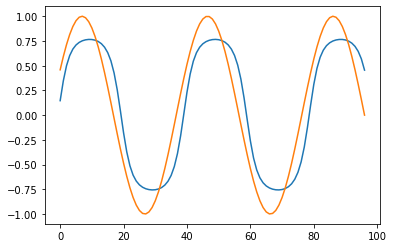

In [28]:
Series(y_pred.reshape(-1)).plot()
Series(y.reshape(-1)).plot()

# 3. RNN의 문제점

- 입력 시퀀스가 길어질수록 타임 스텝의 수가 많아지므로, 타임 스텝에 따라 펼친 네트워크는 매우 깊어진다.
- 앞 부분의 정보를 이용하여 현재를 추론하려고 하는 경우, 그 정보와 현재 시점이 너무 멀리 떨어져 있다면 제대로 예측할 수 없게 된다.
- 이와 같이 시간 차원에서 발생하는 그래디언트 소실을 **장기의존성(long-term dependencies) 문제**라고 한다.
    - 예) the clouds are in the ____.
    - 예) I grew up in France. After coming here, what I did for a living was ... I speak fluent ____.

## 3.1. 장단기 메모리 (LSTM; Long Short-Term Memory)

- 장기 의존성 문제를 해결하기 위해 도입된 발전형 RNN으로, 오랜 기간 동안 필요한 정보들만을 기억하기 위해서 게이트(gate) 개념이 추가되었다.
<img src="img/ch5_8.png" width="70%"> 

※ GRU 참고

- 셀 상태(cell state)의 추가
    - 이전 상태 $h_{(t)}$는 단기(short-term) 기억 상태로 관리하고, 메모리 셀 상태 $C_{(t)}$를 장기(long-term) 상태로 추가한다.
    - 셀 상태는 모듈의 전체 체인을 관통하여 정보를 전달한다.
    <img src="img/ch5_9.png" width="50%"> 

- 게이트(gate) 연산
    - 셀 상태에 정보를 선택적으로 추가하거나 삭제하는 스위치 역할을 하며 입력, 망각, 출력의 3종이 있다.
    - 연산 자체는 시그모이드 층의 결과에 대한 곱셈이며, 시그모이드 결과 값이 1이면 “모든 정보를 유지하라”는 것이고 결과 값이 0이면 “모든 정보를 제거하라”는 의미가 된다.
    <img src="img/ch5_10.png" width="40%"> 

### 장단기 메모리의 수행 절차

1. 장기 기억 $C_{(t-1)}$이 망각 게이트(forget gate)를 거쳐서 일부 기억을 망각한다.
2. 입력 게이트(input gate)에서 선택한 기억을 추가하여 장기 기억 $C_{(t)}$를 갱신한다.
3. 장기 기억 $C_{(t)}$의 복사본이 출력 게이트(output gate)를 거쳐 단기 기억 $h_{(t)}$를 생성한다.

- 망각 게이트(forget gate)
    - 현재 입력 값 $x_{(t)}$와 이전 단기 상태(즉, 출력 값) $h_{(t-1)}$을 받아서 이전 셀의 정보를 망각할 것인지 결정한다.
    - 시그모이드 결과이므로 0과 1사이의 값이 나오며, 1에 가까울수록 이전 정보를 많이 기억하겠다는 것이다.
    <img src="img/ch5_11.png" width="60%"> 

- 입력 게이트(input gate)
    - 현재 입력 값 $x_{(t)}$와 이전 단기 상태(즉, 출력 값) $h_{(t-1)}$을 받아서 현재 셀에 얼마나 반영할 것인지 결정한다.
    - 시그모이드 결과이므로 0과 1사이의 값이 나오며, 1에 가까울수록 정보를 많이 반영하겠다는 것이다.

- 처리 게이트(gate)
    - 현재 입력 값 $x_{(t)}$와 이전 단기 상태(즉, 출력 값) $h_{(t-1)}$을 받아서 현재 셀 상태 값 후보 $\tilde{C}_{(t)}$를 생성한다.
    - tanh 결과이므로 -1과 1사이의 값이 나오며, 1에 가까울수록 현재 정보를 비례해서 반영하겠다는 것이다.
    <img src="img/ch5_12.png" width="60%"> 

- 현재 셀 상태 갱신
    - 망각 게이트와 입력 게이트로부터 계산된 값을 통합하여 현재 셀의 상태를 갱신한다.
    - 결과적으로 현재 셀 상태는 이전 셀 상태(기억)에서 일부를 망각하고 현재 입력 값(정보) 일부를 추가한 결과이다.
    <img src="img/ch5_13.png" width="60%"> 

- 출력 게이트(output gate)
    - 현재 입력 값 $x_{(t)}$와 이전 단기 상태(즉, 출력 값) $h_{(t-1)}$을 받아서 여과하여 출력할 부분을 결정한다.
    - 갱신된 현재 셀의 상태 값 $C_{(t)}$를 -1과 1 사이로 조절한 뒤 출력 게이트의 값을 곱하여 현재 단기 상태를 출력한다.
    <img src="img/ch5_14.png" width="60%"> 

# 실습) 케라스로 LSTM 수행

1. 데이터를 준비한다.
    - IMDB 데이터를 불러온다. 여기에서는 발생 빈도가 높은 10000개의 단어만 사용하였다.
    - **pad_sequence**를 이용하여 데이터(문장) 길이를 동일하게 맞춰준다. 여기에서는 50으로 지정하였다.

In [29]:
from keras.datasets import imdb
from keras.preprocessing import sequence

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = sequence.pad_sequences(X_train, maxlen=50)
X_test = sequence.pad_sequences(X_test, maxlen=50)

17465344/17464789 [==============================] - 2s 0us/step


2. 인공 신경망 모형을 구성한다.
    - (텍스트 데이터 처리이기 때문에) **layers.embeddings**의 **Embedding**으로 워드 임베딩 층을 먼저 생성한다.
        - **input_dim**은 단어 집합의 크기, 즉 전체 단어의 개수이다.
        - **output_dim**은 워드 임베딩 결과의 크기이다.
        - **input_length**는 입력 데이터의 크기, 즉 문장의 길이이다.
        - 임베딩 결과는 각 차원이 (input_dim, input_length, output_dim) 형태인 3차원 배열(3D 텐서)이다.
    - **layers**의 **LSTM**을 이용하여 LSTM 층을 생성한다.
        - **units**는 해당 층에 배치할 노드 수이다.
        - **input_shape**은 입력 데이터의 형태로, (타임스텝의 크기, 입력 특성의 수) 형식을 가진다.
        - **activation**은 활성화 함수로, 기본값은 ‘tanh’이다.
        - **recurrent_activation**은 순환 단계의 활성화 함수로, 기본값은 ‘hard_sigmoid’이다.


In [30]:
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=50))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

3. 모형의 학습 과정에 대한 설정을 한다

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

4. 모형을 학습시킨다.

In [32]:
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
391/391 - 11s - loss: 0.4808 - accuracy: 0.7568
Epoch 2/10
391/391 - 10s - loss: 0.3301 - accuracy: 0.8574
Epoch 3/10
391/391 - 10s - loss: 0.2680 - accuracy: 0.8902
Epoch 4/10
391/391 - 10s - loss: 0.2167 - accuracy: 0.9159
Epoch 5/10
391/391 - 10s - loss: 0.1709 - accuracy: 0.9352
Epoch 6/10
391/391 - 10s - loss: 0.1307 - accuracy: 0.9534
Epoch 7/10
391/391 - 10s - loss: 0.1009 - accuracy: 0.9650
Epoch 8/10
391/391 - 10s - loss: 0.0767 - accuracy: 0.9740
Epoch 9/10
391/391 - 10s - loss: 0.0609 - accuracy: 0.9803
Epoch 10/10
391/391 - 10s - loss: 0.0522 - accuracy: 0.9829


5. 모형의 성능을 평가한다.

In [33]:
loss, acc = model.evaluate(X_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.9666 - accuracy: 0.7680


In [34]:
print('손실값 :', round(loss,3))
print('정확도 :', round(acc, 3))

손실값 : 0.967
정확도 : 0.768


6. 모형의 출력을 확인한다.

In [35]:
y_pred = model.predict(X_test)
print(y_pred[100:103])

[[4.6999753e-03]
 [6.1357021e-04]
 [9.1022092e-01]]


In [37]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[100:103])

[[0]
 [0]
 [1]]


In [1]:
%%javascript
$.getScript('https://seareale.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>